In [58]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mousedrug = pd.read_csv(mouse_drug_data_to_load)
trial = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
data = pd.merge(trial, mousedrug, on='Mouse ID')

# Display the data table for preview
data.head(5)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [59]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
groups = data.groupby(['Drug','Timepoint'])
means = groups['Tumor Volume (mm3)'].mean()
means

# Convert to DataFrame
means = pd.DataFrame(means)
# Preview DataFrame
meansdf = means.reset_index()
meansdf.head(5)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [60]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standerr = groups['Tumor Volume (mm3)'].sem()
standerr
# Convert to DataFrame
semdf = pd.DataFrame(standerr)
semdf = semdf.reset_index()
# Preview DataFrame
semdf.head(5)



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [61]:
# Minor Data Munging to Re-Format the Data Frames
newdata = meansdf.pivot(index='Timepoint', columns='Drug')
newdata
# Preview that Reformatting worked
newdata.columns = newdata.columns.droplevel(0)
newdata

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


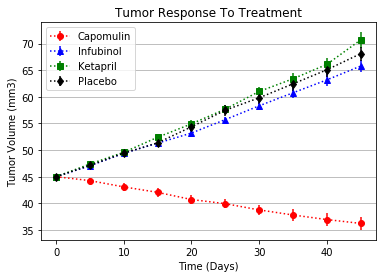

In [65]:
# Generate the Plot (with Error Bars)
fig, plot1 = plt.subplots()
drugsmeasured =  ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
markers = ["o", "^", "s", "d"]
colors = ["red", "blue", "green", "black"]
stderr_x_axis = [row for row in newdata.index]

plot1.set_xlabel("Time (Days)")
plot1.set_ylabel("Tumor Volume (mm3)")
plot1.set_title("Tumor Response To Treatment")

sempivot = semdf.pivot(index="Timepoint", columns="Drug", values='Tumor Volume (mm3)')

i = 0

for drug in drugsmeasured:
    y_axis = newdata[drug]
    plot1.errorbar(stderr_x_axis, y_axis, 
                   sempivot[drug], linestyle=":", 
                   fmt=markers[i], 
                   color=colors[i], 
                   label=drug)
    i += 1
plt.legend()
plot1.yaxis.grid()
plt.savefig("../Images/TumorResponse.png")

# Save the Figure

plt.show()

In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatmean = groups['Metastatic Sites'].mean()
metastatmean
# Convert to DataFrame
metastatdf = pd.DataFrame(metastatmean)
# Preview DataFrame
metastatdf.head(5)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [18]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
semmeta = groups['Metastatic Sites'].sem()

# Convert to DataFrame
semmetadf = pd.DataFrame(semmeta)
semmetafin = semmetadf.reset_index()
# Preview DataFrame
semmetadf.head(5)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [26]:
# Minor Data Munging to Re-Format the Data Frames
metastatic= metastatdf.reset_index()
metastaticfin = metastatic.pivot(index='Timepoint', columns='Drug')
metastaticfin.columns = metastaticx.columns.droplevel(0)
metastaticfin
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


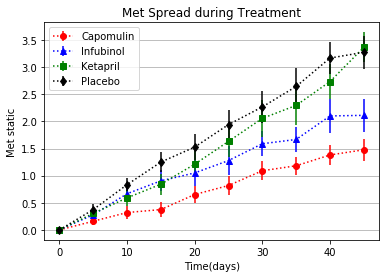

In [74]:
# Generate the Plot (with Error Bars)
fig, plot2 = plt.subplots()
stderr_x_axis = [row for row in newdata.index]

plot2.set_xlabel("Time(days)")
plot2.set_ylabel("Met static")
plot2.set_title("Met Spread during Treatment")

sempivot2 = semmetafin.pivot(index="Timepoint", columns="Drug", values='Metastatic Sites')

i = 0

for drug in drugsmeasured:
    y_axis = metastaticfin[drug]
    plot2.errorbar(stderr_x_axis, y_axis, sempivot2[drug], linestyle=":", fmt=markers[i], color=colors[i], label=drug)
    i = i+1
plt.legend()
plot2.yaxis.grid()
plt.savefig("../Images/MetStatic.png")

# Save the Figure

plt.show()

In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [71]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival = groups['Mouse ID'].count()
survival
# Convert to DataFrame
survivaldf = pd.DataFrame(survival)
survivaldf.reset_index(inplace=True)
# Preview DataFrame
survivaldf.head(5)

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [73]:
# Minor Data Munging to Re-Format the Data Frames
survivaldata = survivaldf.pivot(index='Timepoint', columns='Drug')
# Preview the Data Frame
survivaldata.head(5)

Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)
fig, plot3 = plt.subplots()
stderr_x_axis = [row for row in newdata.index]

plot3.set_xlabel("Met Sites")
plot3.set_ylabel("Tumor Volume (mm3)")
plot3.set_title("Survival During Treatment")

i = 0

for drug in drugsmeasured:
    y_axis = metastaticfin[drug]
    plot3.plot(stderr_x_axis, y_axis, sempivot2[drug], linestyle=":", fmt=markers[i], color=colors[i], label=drug)
    i = i+1
plt.legend()
plot2.yaxis.grid()
plt.savefig("../Images/DrugSurvival.png")

plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [87]:
# Calculate the percent changes for each drug
begining = newdata.iloc[0]
begining
end = newdata.iloc[9]
end
percent = (end - begining)*100 / begining
percent
# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [98]:
percentmeasured = percent[drugsmeasured]
percentmeasured

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

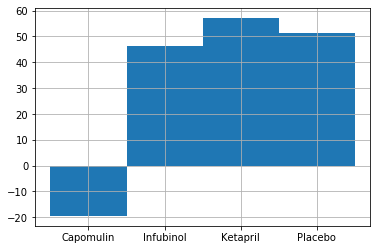

In [104]:
# Store all Relevant Percent Changes into a Tuple

# Splice the data between passing and failing drugs

gain = []
loss = []
for x in percent:
    if x > 0:
        gain.append(x)
    else:
        loss.append(x)


# Orient widths. Add labels, tick marks, etc. 
fig, plot4 = plt.subplots()
#plot4.title('Tumor percent change')
#plot4.ylabel('Percent tumor change')
#plot4.xlabel('Drug name')
plot4.grid()
# Use functions to label the percentages of changes


# Call functions to implement the function calls
plot4.bar(drugsmeasured, percentmeasured, width=1)

# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)